# Graph-Isomorphism Problem

by Toluwalase Ifebajo

# What is Graph-Isomorphism Problem

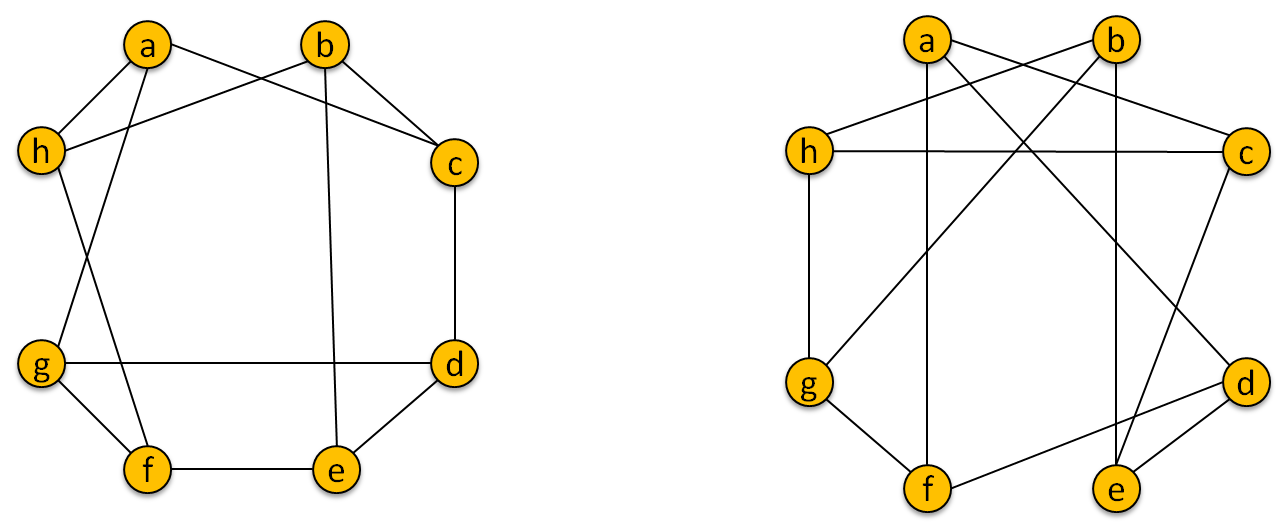
Graphs can take on various shapes and display various visual characteristics. Isomorphic graphs are two graphs that have the same number of vertices, edges, and connection between edges. Even though they don't resemble one another, the diagram below serves as an illustration of this: [4]

An inverse mapping exists for the mapping known as isomorphism. It serves as an explanation of equivalency. In disciplines like pattern recognition, computer vision, and matching, graphs are used. Effective graph isomorphism algorithms may result in significant advances and outstanding innovations in various areas. [5]

Now let's review. We refer to two vertices as being nearby when they are connected by an edge. In the context of graphs, isomorphism refers to a bijection that maintains adjacency. Bijections are

# Graph Isomorphism Implementation 

The algorithm below uses the matrices of two graphs to determine whether or not they are isomorphic.

The following conditions must be met for two graphs to be isomorphic:

There must be an equal number of edges in the two graphs.

The two graphs must have an equal number of vertices.

The length created by the vertices in one graph with an identical degree is also present in the other graph.

The two graphs' degree sequences must match.

In [3]:
# imports
import networkx as nx
import numpy as np
import itertools 

# what the graph look like
params = {'node_color': 'lightblue', 'node_size' : 700, 'font_size': 18, 'with_labels': True}

#take the two adjacent matrices and check if their degree sequeces are equal.
def degreeSeq(matrix):
    
    #array for result
    s = []
    
    # Loop size of matrix.
    for v in range(len(matrix)):
        
        s.append(sum(matrix[v]))
        
    #reverse sort the array and return it.
    
    s.sort(reverse=True)
    
    return s



# Once Ensuring that the degree sequence is equal we see if the graph order of both graphs are equal or not
# checks length of the matrix
def order(matrix):
    
    # If not, returns -1 
    if len(matrix) != len(matrix[0]):
        
        return -1
    else:
        
        # return length
        return len(matrix)


# gets every permutations of the passed matrix.
def permutations(matrix):
    
    #  array of permutations
    m = []
    
    ar = list(range(len(matrix)))
    
    # every possible combinations.
    possCombo = [
        list(i) for i in itertools.permutations(ar, len(ar))
    ]
    
    
    # goes through all the combinations, exchange places and put in array.
    for ar_c in possCombo:
        
        k = matrix
        
        k = k[ar_c]
        
        #Reverse or permute the axes of an array; returns the modified array.
        k = np.transpose(np.transpose(k)[ar_c])
        
        # adds to array
        m.append({
            
            "perm_v":
            
            ar_c,
            
            "a_m":
            
            k
        })
        
    #return array
    return m



# main function
def checkIso(matrix1, matrix2):
    
    # gets degree sequnces
    seq1 = degreeSeq(matrix1)
    
    seq2 = degreeSeq(matrix2)
    
    
    # checks order function
    if order(matrix1) != order(matrix2):
        
        # Not isomorphic
        return False
    
   
    elif np.array_equal(seq1, seq2) == False:
        # Not isomorphic
        return False
    
    # if the two above checks pass
    else:
        for a_m in list(
            
                map(lambda matrix: matrix["a_m"],
                    
                    #permutations of the second matrix for comparison.
                    
                    permutations(matrix2))):
            
            if np.array_equal(matrix1, a_m) == True:
                
                # We have all match returns true
                return True
            
    # else returns false
    return False  


# credit toni canada

# Checking that 2 graphs are Isomorphic

Suppose that we are given two graphs on a relatively small number of vertices. Here's an example:

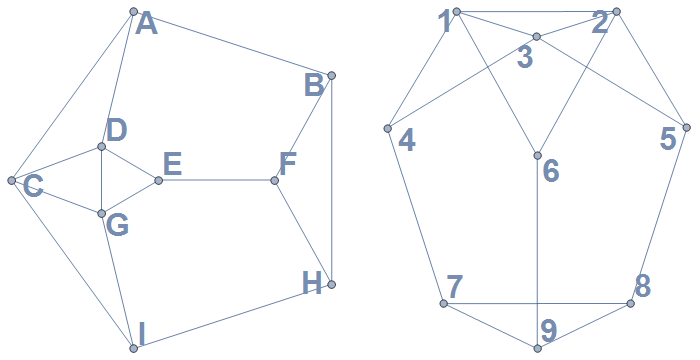

In practice, when the number of vertices is not too large, we can often check for isomorphism without too much work. We do this by picking out distinguishing features of the vertices in each graph. Then we have fewer bijections between the vertex sets to check to see if the graphs are isomorphic.

One of the simplest distinguishing features of a vertex is its degree: the number of edges out of that vertex. For the example in the question, we notice that:

Vertices {A,B,E,F,H,I} of the first graph have degree 3, and vertices {C,D,G} have degree 4.
Vertices {4,5,6,7,8,9} of the second graph have degree 3, and vertices {1,2,3} have degree 4.
So we have reduced our search space significantly from 9!=362,880 to 6!⋅3!=4,320 graph isomorphisms: that's the number of bijections between the vertex sets that send {A,B,E,F,H,I} to {4,5,6,7,8,9} and {C,D,G} to {1,2,3}. (And if the numbers of vertices of each degree didn't match up, we'd know very quickly that there's no graph isomorphism.)

We can further distinguish between the vertices of each degree. For instance, in the first graph, {A,E,I} are vertices of degree 3 that are adjacent to vertices of degree 4; {B,F,H}, on the other hand, are vertices of degree 3 whose neighbors all have degree 3. This narrows the search space even more.

If we start filling in a partial graph isomorphism, pieces fall into place as we go. For example, we could try seeing if there's a graph isomorphism that maps C to 1. Then A (a neighbor of C which has degree 3) must be mapped to 4 or 6 (neighbors of 1 which have degree 3). If A is mapped to 4, then D (a neighbor of A and C) must map to 3 (a neighbor of 1 and 4), and pretty soon the entire isomorphism is there.

To make this work, we will need to do some casework, and might need to backtrack, but usually you should not expect to have many branches to try. Highly symmetric graphs are harder to tackle this way, and in fact they are the places where computer algorithms stumble, too.

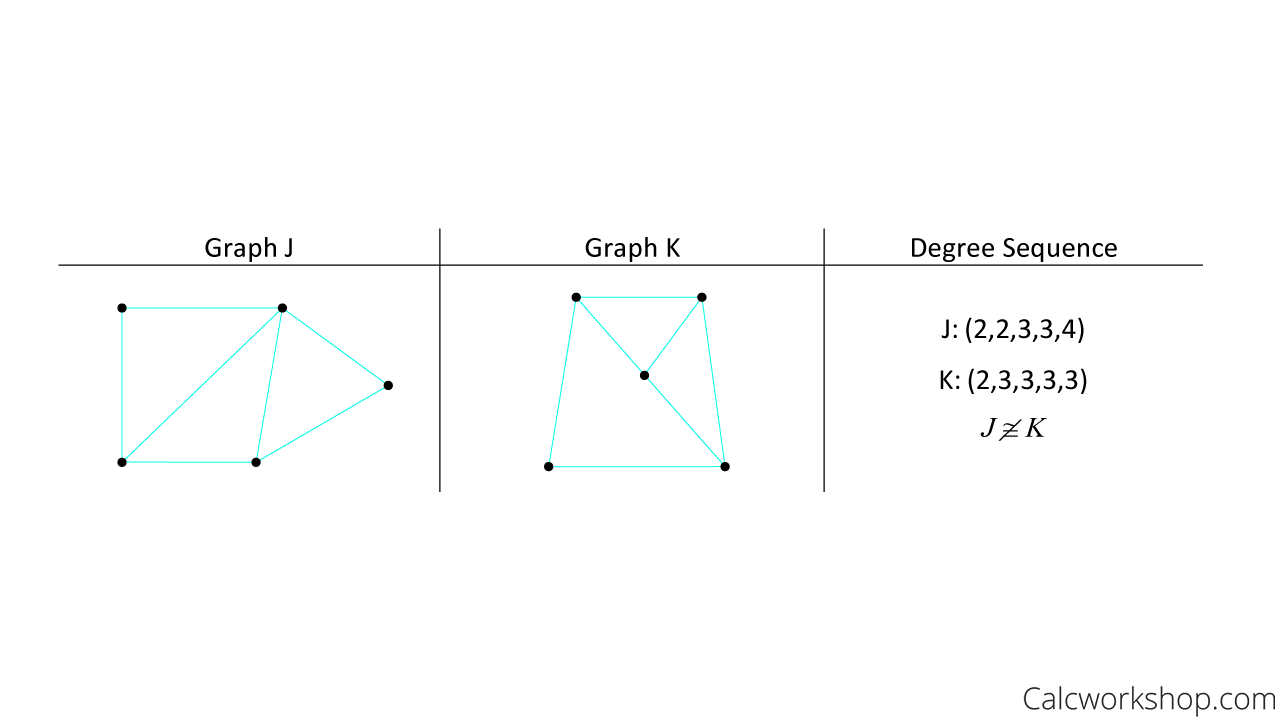

Let’s show the next pair of graphs is not an isomorphism.

The first thing we do is count the number of edges and vertices and see if they match. Then we look at the degree sequence and see if they are also equal. Next, we look for the longest cycle as long as the first few questions have produced a matching result. 


# Representing Graphs

A graph can be represented using 3 data structures- adjacency matrix, adjacency list and adjacency set. 

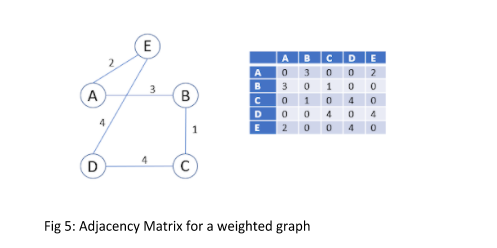

An adjacency matrix can be thought of as a table with rows and columns. The row labels and column labels represent the nodes of a graph. An adjacency matrix is a square matrix where the number of rows, columns and nodes are the same. Each cell of the matrix represents an edge or the relationship between two given nodes. For example, adjacency matrix Aij represents the number of links from i to j, given two nodes i and j. 


    A	B	C	D	E
A	0	0	0	0	1
B	0	0	1	0	0
C	0	1	0	0	1
D	1	0	0	1	0
E	0	1	1	0	0

The adjacency matrix for a directed graph is shown in Fig 3. Observe that it is a square matrix in which the number of rows, columns and nodes remain the same (5 in this case). Each row and column correspond to a node or a vertex of a graph. The cells within the matrix represent the connection that exists between nodes. Since, in the given directed graph, no node is connected to itself, all cells lying on the diagonal of the matrix are marked zero. For the rest of the cells, if there exists a directed edge from a given node to another, then the corresponding cell will be marked one else zero.


In adjacency list representation of a graph, every vertex is represented as a node object. The node may either contain data or a reference to a linked list. This linked list provides a list of all nodes that are adjacent to the current node. Consider a graph containing an edge connecting node A and node B. Then, the node A will be available in node B’s linked list. Fig 6 shows a sample graph of 5 nodes and its corresponding adjacency list.

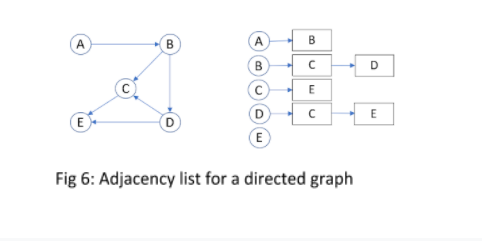

The adjacency set mitigates a few of the challenges posed by adjacency list. Adjacency set is quite similar to adjacency list except for the difference that instead of a linked list; a set of adjacent vertices is provided. Adjacency list and set are often used for sparse graphs with few connections between nodes. Contrarily, adjacency matrix works well for well-connected graphs comprising many nodes.

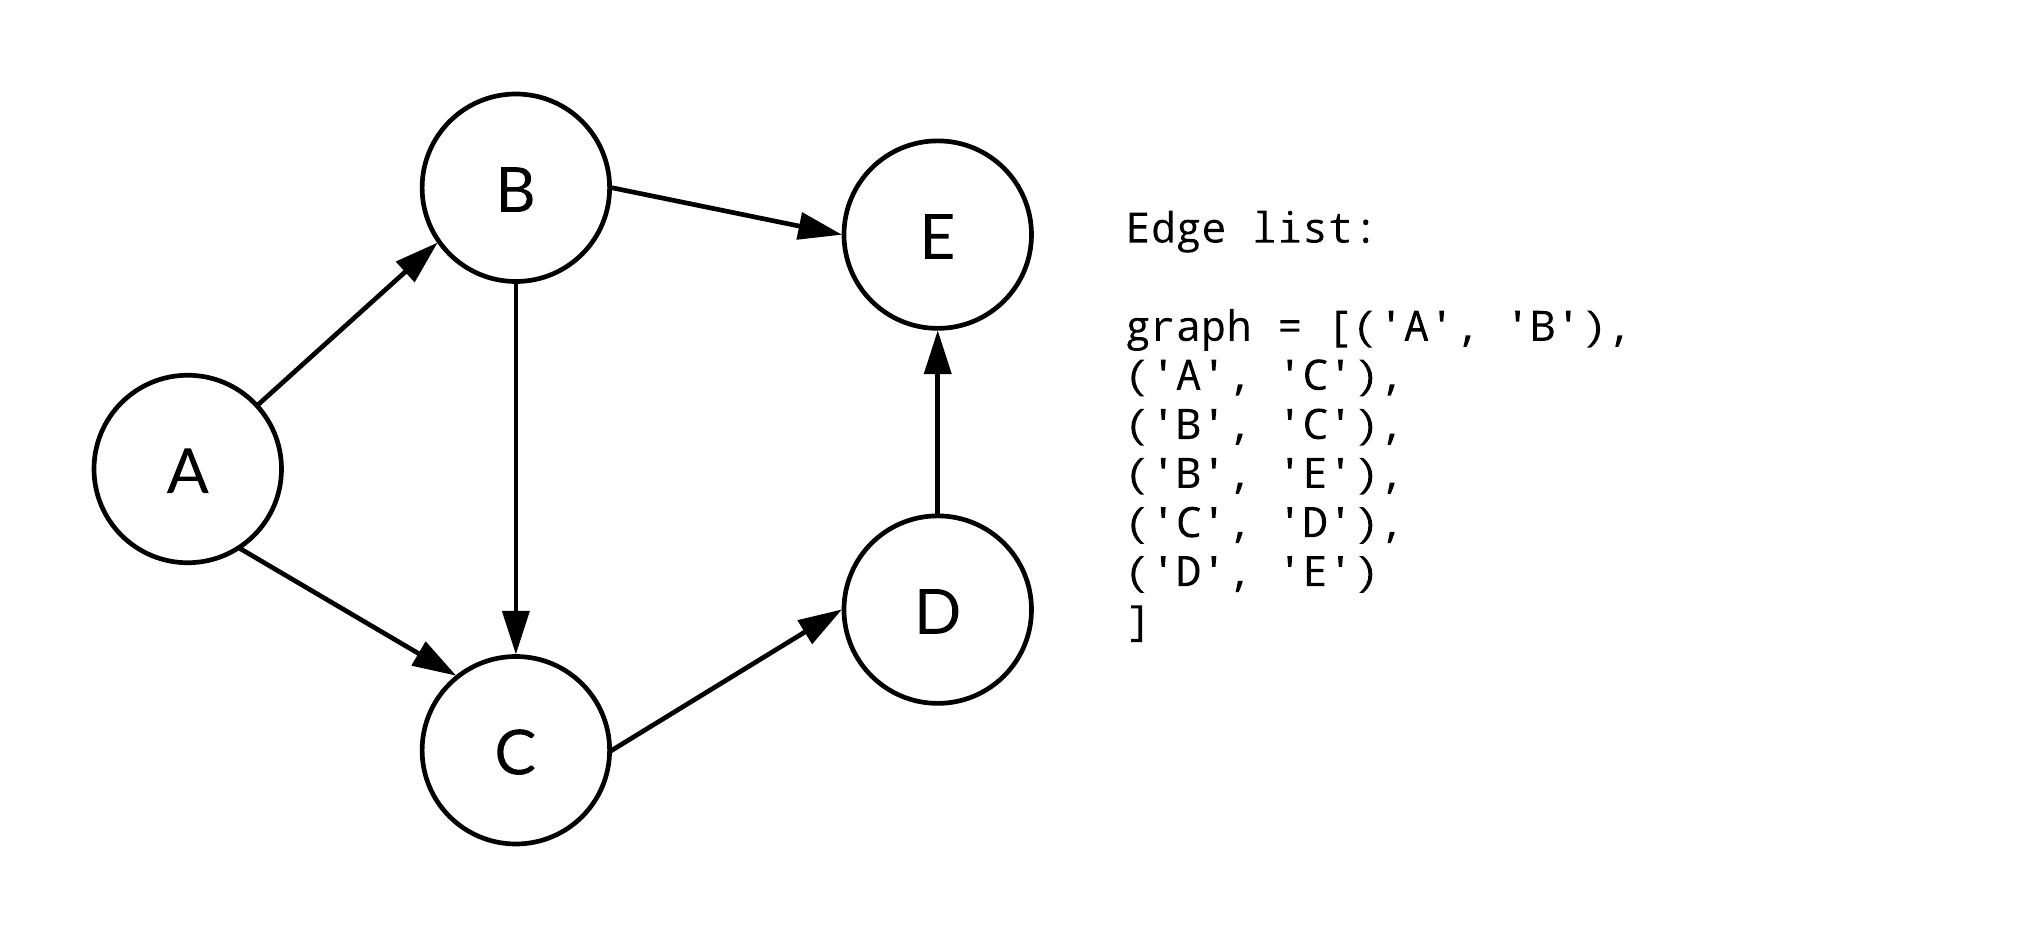

# Adjacency List 

Below is the code for adjacency list representation of an undirected graph using sets: 

In [4]:
# Python3 program to represent adjacency
# list using dictionary
from collections import defaultdict
 
class graph(object):
 
    def __init__(self, v):
         
        self.v = v
        self.graph = defaultdict(set)
 
    # Adds an edge to undirected graph
    def addEdge(self, source, destination):
         
        # Add an edge from source to destination.
        # If source is not present in dict add source to dict
        self.graph.add(destination)
 
        # Add an dge from destination to source.
        # If destination is not present in dict add destination to dict
        self.graph[destination].add(source)
 
    # A utility function to print the adjacency
    # list representation of graph
    def print(self):
         
        for i, adjlist in sorted(self.graph.items()):
            print("Adjacency list of vertex ", i)
            for j in sorted(adjlist, reverse = True):
                    print(j, end = " ")
                         
            print('\n')
             
    # Search for a given edge in graph
    def searchEdge(self,source,destination):
         
        if source in self.graph:
            if destination in self.graph:
                if destination in self.graph:
                    if source in self.graph[destination]:
                        print("Edge from {0} to {1} found.\n".format(source, destination))
                        return
                    else:
                        print("Edge from {0} to {1} not found.\n".format(source, destination))
                        return
                else:
                    print("Edge from {0} to {1} not found.\n".format(source, destination))
                    return
            else:
                print("Destination vertex {} is not present in graph.\n".format(destination))
                return
        else:
            print("Source vertex {} is not present in graph.\n".format(source))
         
# Driver code
if __name__=="__main__":
     
    g = graph(5)
     
    g.addEdge(0, 1)
    g.addEdge(0, 4)
    g.addEdge(1, 2)
    g.addEdge(1, 3)
    g.addEdge(1, 4)
    g.addEdge(2, 3)
    g.addEdge(3, 4)
 
    # Print adjacenecy list
    # representation of graph
    g.print()
 
    # Search the given edge in a graph
    g.searchEdge(2, 1)
    g.searchEdge(0, 3)

AttributeError: 'collections.defaultdict' object has no attribute 'add'

Output
Adjacency list of vertex 0
1 4 

Adjacency list of vertex 1
0 2 3 4 

Adjacency list of vertex 2
1 3 

Adjacency list of vertex 3
1 2 4 

Adjacency list of vertex 4
0 1 3 

Edge from 2 to 1 found.

Edge from 0 to 3 not found.

# Refrences 

https://economictimes.indiatimes.com/definition/graph-theory 

https://en.wikipedia.org/wiki/Vertex_(graph_theory) 

https://www.tutorialspoint.com/graph_theory/graph_theory_isomorphism.htm 

https://simple.wikipedia.org/wiki/Millennium_Prize_Problems 

https://www.geeksforgeeks.org/graph-and-its-representations/ 

https://www.geeksforgeeks.org/graph-representations-using-set-hash/
